# TRABALHANDO COM ARQUIVOS(ENTRADA E SAIDA) ##

### CRIANDO E LENDO ARQUIVOS ###

**Tabela de atributos** 

<table border="1" class="docutils" style="float: left;">
<colgroup>
<col width="11%" />
<col width="89%" />
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td>r</td>
<td>ler</td>
</tr>
<tr class="row-even"><td>r+</td>
<td>ler, escrever</td>
</tr>
<tr class="row-odd"><td>w</td>
<td>escrever, criar, truncar</td>
</tr>
<tr class="row-even"><td>w+</td>
<td>ler, escrever, criar, truncar</td>
</tr>
<tr class="row-odd"><td>a</td>
<td>escrever, criar, adicionar ao final</td>
</tr>
<tr class="row-even"><td>a+</td>
<td>ler, escrever, criar, adicionar ao final</td>
</tr>
</tbody>
</table>

** Criando Arquivos **

In [35]:
arquivo_dados = "arquivo.dat"

"arquivo.dat"

In [36]:
typeof(arquivo_dados)

ASCIIString

** Gravando dados **

Abrir o arquivo criado com atributo de gravação "w" e vincular a uma variável chamada dados. Se ja foi criado o arquivo use open("arquivo.dat","w") senão os dados serão sobreescritos

In [37]:
dados = open(arquivo_dados, "w")

IOStream(<file arquivo.dat>)

ou direto

In [38]:
dados = open("arquivo.dat", "w")

IOStream(<file arquivo.dat>)

In [39]:
write(dados, "caramba!")
write(dados, "Maluco,")
write(dados, "Eita,")

5

In [40]:
# fechando o arquivo

close(dados)

** Lendo arquivo **

In [41]:
readall("arquivo.dat")

"caramba!Maluco,Eita,"

Atribuindo o arquivo a uma variável para fazer a leitura

In [42]:
# arquivo aberto com atributo de somente leitura

dados = open(arquivo_dados,"r")

IOStream(<file arquivo.dat>)

In [43]:
linha_dados = readall(dados)

"caramba!Maluco,Eita,"

In [44]:
close(dados)

In [45]:
# mesmo depois de fechado, pode ser lido a partir da variável

display(linha_dados)

"caramba!Maluco,Eita,"

** obs** se fizer :

readall(dados)

close(dados)

display(linha_dados)

Não vai aparecer nada! uma vez que o conteúdo não está vinculado à uma variável. Logo, ao fechar o arquivo, não serã possível ler

In [46]:
readall("arquivo.dat")

"caramba!Maluco,Eita,"

In [47]:
arquivo_dados = open("arquivo.dat", "w")

IOStream(<file arquivo.dat>)

In [48]:
write(arquivo_dados, "opa ih....!")

11

In [49]:
readall("arquivo.dat")

# não leu nada porque o atributo é somente escrita

""

In [50]:
close(arquivo_dados)

In [51]:
readall("arquivo.dat")

"opa ih....!"

veja que apagou tudo!

In [52]:
# ler o ultimo conteúdo gravado no arquivo

readall("arquivo.dat")

"opa ih....!"

In [53]:
#abrindo o arquivo com atributo de ler, escrever, criar e acrescentar conteúdo ao final

arquivo_dados= open("arquivo.dat", "a+")

IOStream(<file arquivo.dat>)

In [54]:
write(arquivo_dados, "ah...!\n")

7

In [55]:
readall("arquivo.dat")

# le o arquivo sem ainda ter gravado os dados da memoria no arquivo em disco

"opa ih....!"

In [56]:
close(arquivo_dados)

In [57]:
readall("arquivo.dat")

"opa ih....!ah...!\n"

***Agora não apagou ;)***

### MATRIZ PARA ARQUIVO ###

Se você tem uma matriz que deseja salvar em um arquivo de texto, ou se você quiser ler dados de um arquivo em uma matriz, você pode usar as funções writedlm e readdlm.

**writedlm()** escreve o conteúdo de uma matriz (ou qualquer objeto iterável) para um arquivo de texto, e **readdlm()** lê os dados a partir de um arquivo em um array:

In [58]:
dados = rand(5,5)

5x5 Array{Float64,2}:
 0.144766   0.897898  0.622526  0.430469  0.413341 
 0.857417   0.870891  0.557436  0.261647  0.0622014
 0.0908649  0.470912  0.848287  0.754214  0.322548 
 0.781639   0.624653  0.884897  0.260634  0.0582625
 0.133702   0.833115  0.605728  0.928628  0.506532 

In [59]:
writedlm("matriz.dat", dados)

In [60]:
readdlm("matriz.dat")

5x5 Array{Float64,2}:
 0.144766   0.897898  0.622526  0.430469  0.413341 
 0.857417   0.870891  0.557436  0.261647  0.0622014
 0.0908649  0.470912  0.848287  0.754214  0.322548 
 0.781639   0.624653  0.884897  0.260634  0.0582625
 0.133702   0.833115  0.605728  0.928628  0.506532 

In [61]:
b = "hehehehe"

"hehehehe"

In [62]:
writedlm("matriz.dat", b)

In [63]:
readdlm("matriz.dat")

8x1 Array{Any,2}:
 "h"
 "e"
 "h"
 "e"
 "h"
 "e"
 "h"
 "e"

### DATA FRAMES ###

* #### CRIAR , LER E GRAVAR DATAFRAMES ####

In [64]:
using DataFrames

In [93]:
# criar o dataframe.
# Nomes das colunas não podem ter espaço

dados = DataFrame(Nome_do_software =["scilab","julia"], Ano = [2005,2012])

dados

,Nome_do_software,Ano
1,scilab,2005
2,julia,2012


Ou assim:

In [95]:
# Nomes das colunas não podem ter espaço

dados = DataFrame()

dados[:Nome_do_sofware] = ["scilab","julia"]
dados[:Ano]             = [2005,2012]

dados

,Nome_do_sofware,Ano
1,scilab,2005
2,julia,2012


In [96]:
# salvar no arquivo 

writetable("dataframe.dat", dados)

In [97]:
# exibindo o arquivo e o conteúdo 

DataFrames.readtable("dataframe.dat")

,Nome_do_sofware,Ano
1,scilab,2005
2,julia,2012


Outro exemplo

In [100]:
# Nomes das colunas não podem ter espaço

Softwares = DataFrame()

Softwares[:Nome_do_software]  = ["Julia", "SageMath", "Maxima", "Octave"]
Softwares[:Ano_de_lancamento] = [2012, 2005, 1980, 2000]
Softwares[:Site]              = ["julialang.org","sagemath.org","maxima.org","gnu.org/octave"]

Softwares

,Nome_do_software,Ano_de_lancamento,Site
1,Julia,2012,julialang.org
2,SageMath,2005,sagemath.org
3,Maxima,1980,maxima.org
4,Octave,2000,gnu.org/octave


In [101]:
names(Softwares) 

3-element Array{Symbol,1}:
 :Nome_do_software 
 :Ano_de_lancamento
 :Site             

In [102]:
# saber os tipos dos elementos do dataframe. Aqui temos String (primeira coluna) e tipo Inteiro (segunda coluna)

eltypes(Softwares)

3-element Array{Type{T},1}:
 ASCIIString
 Int64      
 ASCIIString

In [103]:
# Visualizando toda a primeira coluna

Softwares[1]

4-element DataArrays.DataArray{ASCIIString,1}:
 "Julia"   
 "SageMath"
 "Maxima"  
 "Octave"  

In [104]:
# acessando o terceiro elemento da primeira coluna

Softwares[1][3]

"Maxima"

In [105]:
Softwares[2] 

4-element DataArrays.DataArray{Int64,1}:
 2012
 2005
 1980
 2000

* #### ARQUIVOS CSV ####

A melhor forma de trabalhar com arquivos é salva-los no formato "CSV". ***Comma-separated values*** (ou CSV) é um formato de arquivo que armazena dados tabelados, cujo grande uso data da época dos mainframes. Por serem bastante simples, arquivos .csv são comuns em todas as plataformas de computador. O CSV é um implementação particular de arquivos de texto separados por um delimitador, que usa a vírgula e a quebra de linha para separar os valores. O formato também usa as aspas em campos no qual são usados os caracteres reservados (vírgula e quebra de linha). Essa robustez no formato torna o CSV mais amplo que outros formatos digitais do mesmo segmento.
Fonte:  http://pt.wikipedia.org/wiki/Comma-separated_values. Forma geral:

coluna1, coluna2

dado, dado

** Importar uma arquivo csv**

In [106]:
using DataFrames, Winston

In [107]:
tabela_dados_reta = DataFrames.readtable("dados_reta.csv")

,x,y
1,0.0,-0.183440428023042
2,0.2,-0.131101157495126
3,0.4,0.0268875670852843
4,0.8,0.110532679260319
5,1.0,0.253944632998395
6,1.2,0.257190123748649
7,1.4,0.531888837111346
8,1.6,0.579048247883555
9,2.0,0.935180993484717
10,2.2,0.916600344376623


In [108]:
# visualizar toda a primeira coluna

tabela_dados_reta[1]

14-element DataArrays.DataArray{Float64,1}:
 0.0
 0.2
 0.4
 0.8
 1.0
 1.2
 1.4
 1.6
 2.0
 2.2
 2.6
 2.8
 3.0
 3.4

In [109]:
# Acessar o 7 elemento da primeira coluna

tabela_dados_reta[1][7]

1.4

In [110]:
# Visualizar toda a segunda coluna

tabela_dados_reta[2]

14-element DataArrays.DataArray{Float64,1}:
 -0.18344  
 -0.131101 
  0.0268876
  0.110533 
  0.253945 
  0.25719  
  0.531889 
  0.579048 
  0.935181 
  0.9166   
  1.13329  
  1.26893  
  1.10203  
  1.13392  

** Gerando um gráfico **

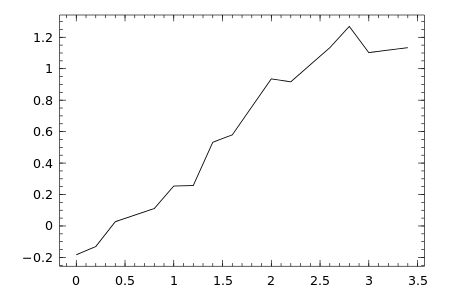

In [111]:
Winston.plot(tabela_dados_reta[1],tabela_dados_reta[2])

** Editar dados **

In [112]:
tabela_dados_reta[2][5] , tabela_dados_reta[2][6]

(0.253944632998395,0.257190123748649)

In [113]:
tabela_dados_reta[2][5] = 0 ; tabela_dados_reta[2][6] = 0

0

In [83]:
tabela_dados_reta[2]

14-element DataArrays.DataArray{Float64,1}:
 -0.18344  
 -0.131101 
  0.0268876
  0.110533 
  0.0      
  0.0      
  0.531889 
  0.579048 
  0.935181 
  0.9166   
  1.13329  
  1.26893  
  1.10203  
  1.13392  

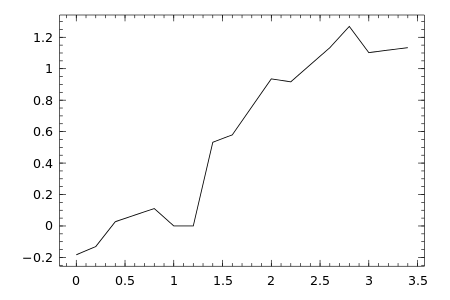

In [84]:
Winston.plot(tabela_dados_reta[1],tabela_dados_reta[2])

** Manipulações algebricas **

Com uma coluna de dados pode ser feita qualquer manipulação matemática. No exemplo, os dados da coluna 1 serão multiplicados por 10.

In [91]:
tabela_dados_reta[1]*10

14-element DataArrays.DataArray{Float64,1}:
  0.0
  2.0
  4.0
  8.0
 10.0
 12.0
 14.0
 16.0
 20.0
 22.0
 26.0
 28.0
 30.0
 34.0

** Salvar dados em um arquivo CSV **



In [86]:
# Nomes das colunas não podem ter espaço

Softwares = DataFrame()

Softwares[:Nome_do_software]  = ["Julia", "SageMath", "Maxima", "Octave"]
Softwares[:Ano_de_lancamento] = [2012, 2005, 1980, 2000]

Softwares

,Nome_do_software,Ano_de_lancamento
1,Julia,2012
2,SageMath,2005
3,Maxima,1980
4,Octave,2000


In [87]:
writetable("Softwares1.csv", Softwares, separator = ',', header = true)

In [88]:
DataFrames.readtable("Softwares1.csv")

,Nome_do_software,Ano_de_lancamento
1,Julia,2012
2,SageMath,2005
3,Maxima,1980
4,Octave,2000


In [89]:
writetable("Softwares2.csv", Softwares, separator = ',', header = false)

In [90]:
DataFrames.readtable("Softwares2.csv")

,Julia,x2012
1,SageMath,2005
2,Maxima,1980
3,Octave,2000
